In [19]:

import iris
import iris.quickplot as qplt
from iris import *
from iris.analysis import *
from iris.analysis.cartography import *
from iris.coord_categorisation import *
import matplotlib.pyplot as plt
from scipy.stats import *
import sys
import numpy
import iris.coord_categorisation
from numpy import *
from matplotlib.pyplot import *
from scipy.stats.mstats import *

/home/cj362/anaconda3/envs/py38/lib/python3.8/site-packages/iris/analysis/cartography.py:394: UserWarning: Using DEFAULT_SPHERICAL_EARTH_RADIUS.
  warnings.warn("Using DEFAULT_SPHERICAL_EARTH_RADIUS.")


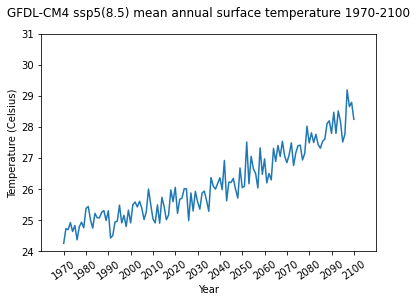

In [30]:
# Generate annual mean surface temperature data
# Will reveal background trend using non-cumulative variable

## Define annual mean over all areas function
def area_avg(cube):
    try:
        cube.coord('latitude').guess_bounds()
    except:
        pass
    try:
        cube.coord('longitude').guess_bounds()
    except:
        pass
    grid_areas = iris.analysis.cartography.area_weights(cube)
    annual_area_mean = cube.collapsed(['longitude', 'latitude'],iris.analysis.MEAN, weights=grid_areas)
    return annual_area_mean


## Load in data
cube = iris.load_cube('/data/local_ssd/cj362/S2P3Rv2.0/dhw/GFDL-CM4_ssp585_1970_2100_surfacetemperature_all.nc')
iris.coord_categorisation.add_year(cube,'time', name='year') # Add year dimension
annual_cube=cube.aggregated_by('year',iris.analysis.MEAN) # Calculate for year dimension

# Create annual average data 
annual_cube_area_avg = area_avg(annual_cube) # Call upon function to average over all grid squares
annual_cube_area_avg_data = annual_cube_area_avg.data  # Extract data


# Catch out datasets that are too long
# should only be 131 values
if (len(annual_cube_area_avg_data >131)):
    annual_cube_area_avg_data = annual_cube_area_avg_data[0:131]
    

## Plotting
# Generate x-values array:
x_array =[]
for i in range(1970,2101):
    x_array.append(i)
    
# Define y-values array:
y_array = annual_cube_area_avg_data

# Create plot
plt.plot(x_array,y_array)
plt.axis([1960,2110,24,31])                 # Set x and y axis limits
plt.xticks(np.arange(1970, 2110, step=10))  # Set label locations (2110 necessary in order to get 2100 label)
plt.xticks(rotation=35)                     # Set label rotation
plt.title('GFDL-CM4 ssp5(8.5) mean annual surface temperature 1970-2100', pad=17)  # pad relates to the vertical offset from plot area
xlabel('Year')
ylabel('Temperature (Celsius)')
savefig('/data/local_ssd/cj362/S2P3Rv2.0/dhw/background_trend_outputs/surface_temperature_mean/GFDL-CM4_ssp585_surfacetemperature.png')



unknown / (unknown)                 (time: 41920; latitude: 161; longitude: 131)
     Dimension coordinates:
          time                           x                -               -
          latitude                       -                x               -
          longitude                      -                -               x
     Scalar coordinates:
          month: Jan|Feb|Mar|Apr|May|Jun|Jul|Aug|Sep|Oct|Nov|Dec
          month_number: 6.5, bound=(1, 12)
          year: 1970, bound=(1970, 1970)
     Attributes:
          CDI: Climate Data Interface version ?? (http://mpimet.mpg.de/cdi)
          CDO: Climate Data Operators version 1.9.3 (http://mpimet.mpg.de/cdo)
          Conventions: CF-1.7
          NCO: 4.7.2
          history: Fri Jun 04 15:10:51 2021: cdo mergetime MIROC6_ssp245_1970_2100_surfacetemperature_1970.nc...


/home/cj362/anaconda3/envs/py38/lib/python3.8/site-packages/iris/analysis/cartography.py:394: UserWarning: Using DEFAULT_SPHERICAL_EARTH_RADIUS.
  warnings.warn("Using DEFAULT_SPHERICAL_EARTH_RADIUS.")



[0.98517328 1.03751643 1.32643342 1.72233835 0.95697441 1.64349849
 0.69950606 0.31494635 0.70814022 0.53875    0.62135313 0.59299124
 0.51269577 0.85873335 0.47182636 1.86522597 0.28269931 0.64819877
 0.08187583 1.06461426 1.49657881 1.2017316  0.88090592 0.50348034
 1.11651838 1.79467888 1.60459992 1.05712938 0.29750108 2.42192232
 0.35744668 0.43179328 1.20654405 1.32888085 1.45146352 1.26786105
 2.10072727 0.96429769 1.67437723 1.0129428  2.37134525 2.27772105
 1.83539042 0.74537985 1.03454538 1.04339518 0.95688156 1.40140005
 1.65182556 0.62621914 0.61845056 0.93875    1.06928555 1.833616
 4.06736139 1.46402782 1.6602835  2.17590571 2.65253159 3.7456368
 1.55621413 3.63450099 1.74355994 1.23250105 2.11018983 1.52635807
 1.46701752 1.24043532 2.31735653 2.23319099 1.23225671 1.11551899
 2.10926608 3.36205048 4.10527533 1.36832989 3.06032894 1.98198462
 1.85849903 3.41258812 4.39244224 1.30233257 1.89807316 1.59620285
 0.86934027 1.91222501 2.03616147 2.49910662 4.46499974 3.028257

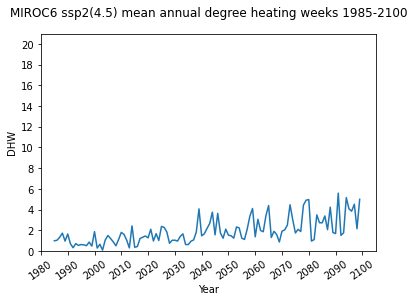

In [43]:
# Generate annual dhw data
# Will reveal background trend using a cumulative stress variable
# Using the maxmimum value is opted for eventually becaue this will highlight better the stress as it only takes one high
# event to cause severe bleaching with impacts lasting for the whole year and beyond. 

## Define annual mean across all areas function
def area_mean(dhw_cube):
    try:
        dhw_cube.coord('latitude').guess_bounds()
    except:
        pass
    try:
        dhw_cube.coord('longitude').guess_bounds()
    except:
        pass
    grid_areas = iris.analysis.cartography.area_weights(dhw_cube)
    return dhw_cube.collapsed(['longitude', 'latitude'],iris.analysis.MEAN, weights=grid_areas)

## Read in data
dhw_cube = iris.load_cube('/data/local_ssd/cj362/S2P3Rv2.0/dhw/dhw_script_outputs/MIROC6_ssp245_daily_dhw.nc')
print(dhw_cube)
dhw_cube.remove_coord('year')
dhw_cube.remove_coord('month')
dhw_cube.remove_coord('month_number')

iris.coord_categorisation.add_year(dhw_cube,'time', name='year')   # Add year dimension
dhw_annual_cube=dhw_cube.aggregated_by('year',iris.analysis.MEAN)  # Calculate for year dimension
cube_annual_area_mean = area_mean(dhw_annual_cube)   # Call upon function to average over all grid squares

## Extract cube data
cube_annual_area_mean_data= cube_annual_area_mean.data
#print(cube_annual_area_mean_data)

#filtering out crazy values and assigning them as a Nan
'''
if np.nanmax(cube_annual_area_mean_data) > 10000:
    cube_annual_area_mean_data[np.where(cube_annual_area_mean_data > 10000)] = cube_annual_area_mean_data.fill_value
    cube_annual_area_mean_data.mask[np.where(cube_annual_area_mean_data > 10000)] = True
'''
for i in range(len(cube_annual_area_mean_data+1)):
    if (cube_annual_area_mean_data[i]>10000):
        cube_annual_area_mean_data[i]=float("Nan")


print()
print(cube_annual_area_mean_data)

## Plotting
x_array =[]                            # Generate x-values array:
for i in range(1985,2100):
    x_array.append(i)
y_array = cube_annual_area_mean_data   # Define y-values array:


# Create plot
plt.plot(x_array,y_array)
plt.axis([1980,2105,0,21])                 # Set x and y axis limits
plt.xticks(np.arange(1980, 2110, step=10))  # Set label locations (2110 necessary in order to get 2100 label)
plt.xticks(rotation=35)                     # Set label rotation
plt.yticks(np.arange(0,21, step=2))        # Set y label locations
title('MIROC6 ssp2(4.5) mean annual degree heating weeks 1985-2100',pad=17)  # pad relates to offset
xlabel('Year')
ylabel('DHW')
savefig('/data/local_ssd/cj362/S2P3Rv2.0/dhw/background_trend_outputs/dhw_mean/MIROC6_ssp245_dhw_annual_mean.png')



/home/cj362/anaconda3/envs/py38/lib/python3.8/site-packages/iris/analysis/cartography.py:394: UserWarning: Using DEFAULT_SPHERICAL_EARTH_RADIUS.
  warnings.warn("Using DEFAULT_SPHERICAL_EARTH_RADIUS.")


[ 4.2415413   4.75365346  6.72165139  6.81942658  4.29179196  7.26000889
  3.31071697  2.60819551  3.12399636  2.36487375  2.65900469  2.41124894
  2.6333844   3.55887501  2.93390213  8.04322893  1.24028729  2.79632391
  0.76265898  4.66048317  6.70157735  5.14855422  4.04580033  2.6392774
  4.53262699  7.69841053  6.74952984  4.95538923  2.70094366  7.89631959
  1.6539256   1.87697594  5.41122019  4.9903905   6.09532952  6.14069609
  9.43877887  4.22739056  7.20310687  5.08102332 10.51799958 10.56188902
  7.83683526  4.12773002  4.94404192  4.67626241  3.98726642  6.16849022
  7.09647647  3.01638248  2.46111939  4.32344419  4.47029992  7.98604949
 17.83025798  6.21626818  7.07575792  8.77926433 11.91041495 14.10309071
  6.55618716 12.71244776  8.75658822  6.23803143  9.66850741  6.00316136
  6.39547548  6.08239926  9.74933855  9.10042966  5.86993675  5.43945483
  9.12577234 12.35752875 16.52423793  5.80211663 12.25878143  7.04175253
  7.57700917 13.89616857 19.6425942   5.60828054  8.

Text(0, 0.5, 'DHW')

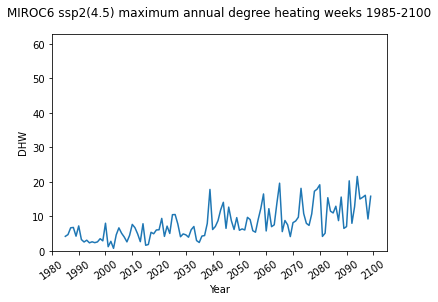

In [69]:
## Define function for annual max across all areas

def area_mean(dhw_cube):
    try:
        dhw_cube.coord('latitude').guess_bounds()
    except:
        pass
    try:
        dhw_cube.coord('longitude').guess_bounds()
    except:
        pass
    grid_areas = iris.analysis.cartography.area_weights(dhw_cube)
    return dhw_cube.collapsed(['longitude', 'latitude'],iris.analysis.MEAN, weights=grid_areas)

## Read in data
dhw_cube = iris.load_cube('/data/local_ssd/cj362/S2P3Rv2.0/dhw/dhw_script_outputs/MIROC6_ssp245_daily_dhw.nc')
# print(dhw_cube)
dhw_cube.remove_coord('year')
dhw_cube.remove_coord('month')
dhw_cube.remove_coord('month_number')
# print(dhw_cube)

try:
    iris.coord_categorisation.add_year(dhw_cube,'time', name='year')
except:
    pass
dhw_cube_annual_max=dhw_cube.aggregated_by('year',iris.analysis.MAX)  # Calculate for year dimension
# print(dhw_cube_annual_max)
# print(dhw_cube_annual_max.data)
dhw_cube_annual_area_max = area_mean(dhw_cube_annual_max)             # Explanation: essentially is the mean of all the maximum values projected for each grid square for each year
# print(dhw_cube_annual_area_max)
dhw_cube_annual_area_max_data = dhw_cube_annual_area_max.data
print(dhw_cube_annual_area_max_data)

#filtering out crazy values and assigning them as a Nan
for i in range(len(dhw_cube_annual_area_max_data+1)):
    if (dhw_cube_annual_area_max_data[i]>10000):
        dhw_cube_annual_area_max_data[i]=float("Nan")
        

# print(dhw_cube_annual_area_max)
# print()
# print(dhw_cube_annual_area_max_data)

## Plotting
x_array =[]                                 # Generate x-values array:
for i in range(1985,2100):
    x_array.append(i)
y_array = dhw_cube_annual_area_max_data     # Define y-values array:


# Create plot
plt.plot(x_array,y_array)
plt.axis([1980,2105,0,63])                  # Set x and y axis limits
plt.xticks(np.arange(1980, 2110, step=10))  # Set x abel locations (2110 necessary in order to get 2100 label)
plt.xticks(rotation=35)                     # Set label rotation
plt.yticks(np.arange(0,63, step = 10))       # Set y label locations 
title('MIROC6 ssp2(4.5) maximum annual degree heating weeks 1985-2100',pad=17)  # pad relates to offset
xlabel('Year')
ylabel('DHW')
# savefig('/data/local_ssd/cj362/S2P3Rv2.0/dhw/background_trend_outputs/dhw_max/MIROC6_ssp245_dhw_annual_max.png')

In [71]:
## Detrending
# Requires previous cell to be run before for variable indexing

def quadratic_function(x,a,b,c):    
    y = (a*(x**2.0)) + (b*x) + c
    return y

dhw_cube_annual_area_max_detrended = dhw_cube_annual_area_max.copy()   
dhw_cube_annual_area_max_detrended_data = dhw_cube_annual_area_max_detrended.data

shape = np.shape(dhw_cube_annual_area_max_detrended_data) # Returns the shape of the array i.e., how many items are in the array
print(shape)
print(type(shape))
output_cube_data = dhw_cube_annual_area_max_detrended_data.copy()
print(output_cube_data)
output_cube_data[:] = np.nan # Converts all values (:) in the array to Nan values

for i in range(shape[0]):
    for j in range(shape[0]):
        if dhw_cube_annual_area_max_detrended_data.mask[0,i,j] == False:
            parameters, var = curve_fit(quadratic_function,np.arange(shape[0]),dhw_cube_annual_area_max_detrended_data[:,i,j])
            y_values_anomaly_from_curve = quadratic_function(np.arange(shape[0]), *parameters)
            output_cube_data[:,i,j] = dhw_cube_annual_area_max_detrended_data[:,i,j]-y_values_anomaly_from_curve

# This bit of code essentially deals with all the odd values:
# np.isnan is used to identify where the data value is a Nan value
# the .fill_value function fills the specified data point by default as None
output_cube_data.data[np.where(np.isnan(output_cube_data))] = output_cube_data.fill_value
output_cube_data[np.where(output_cube_data == 0.0)] = output_cube_data.fill_value
output_cube_data.mask[np.where(np.isnan(output_cube_data))] = True    # Masks data values that are Nans to True (meaning they are ignored)
output_cube_data.mask[np.where(output_cube_data == output_cube_data.fill_value)] = True   # Masks data values that have been assigned using fill_value to True also

#Put the detrended data back in to the original cube
dhw_cube_annual_area_max_detrended_data = output_cube_data

print(dhw_cube_annual_area_max_detrended)

(115,)
<class 'tuple'>
[ 4.2415413   4.75365346  6.72165139  6.81942658  4.29179196  7.26000889
  3.31071697  2.60819551  3.12399636  2.36487375  2.65900469  2.41124894
  2.6333844   3.55887501  2.93390213  8.04322893  1.24028729  2.79632391
  0.76265898  4.66048317  6.70157735  5.14855422  4.04580033  2.6392774
  4.53262699  7.69841053  6.74952984  4.95538923  2.70094366  7.89631959
  1.6539256   1.87697594  5.41122019  4.9903905   6.09532952  6.14069609
  9.43877887  4.22739056  7.20310687  5.08102332 10.51799958 10.56188902
  7.83683526  4.12773002  4.94404192  4.67626241  3.98726642  6.16849022
  7.09647647  3.01638248  2.46111939  4.32344419  4.47029992  7.98604949
 17.83025798  6.21626818  7.07575792  8.77926433 11.91041495 14.10309071
  6.55618716 12.71244776  8.75658822  6.23803143  9.66850741  6.00316136
  6.39547548  6.08239926  9.74933855  9.10042966  5.86993675  5.43945483
  9.12577234 12.35752875 16.52423793  5.80211663 12.25878143  7.04175253
  7.57700917 13.89616857 19.6

IndexError: invalid index to scalar variable.